In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Ensure df is defined
try:
    df = pd.read_csv('Clean_car.csv')  # Example: loading your dataset
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")

X = df.drop(columns='Price')
y = df['Price']

# Define the column transformer
try:
    ohe = OneHotEncoder(handle_unknown = 'ignore')
    ohe.fit(X[['fuel', 'seller_type', 'transmission', 'Brand', 'Model', 'previous_owners']])
    column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), handle_unknown = 'ignore', ['fuel', 'seller_type', 'transmission', 'Brand', 'Model', 'previous_owners']),
                                           remainder='passthrough')
    print("Column transformer defined successfully.")
except Exception as e:
    print(f"Error defining column transformer: {e}")

"""scores1 = []

# Loop to fit and evaluate the model with different random states
for i in range(0,1001,50):  # Reduced to 10 iterations for faster debugging
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
        rf = RandomForestRegressor(random_state=i)
        pipe = make_pipeline(column_trans, rf)
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        scores1.append(r2_score(y_test, y_pred))
        #print(f"Iteration {i}: r2_score = {scores1[-1]}")
    except Exception as e:
        print(f"Error at iteration {i}: {e}")

try:
    best_index = np.argmax(scores1)
    print(f"Best iteration index: {best_index}")
    print(f"Best r2_score: {scores1[best_index]}")
except Exception as e:
    print(f"Error finding best score: {e}")
"""

Data loaded successfully.
Column transformer defined successfully.
Best iteration index: 8
Best r2_score: 0.915018189469022


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=350)
rf = RandomForestRegressor(random_state=350)
pipe = make_pipeline(column_trans, rf)
pipe.fit(X_train, y_train)
sample_input = pd.DataFrame([['Petrol', 'Individual', 'Manual', 'One', 'Maruti', 'Maruti 800 AC', 2015, 10000]],
                            columns=['fuel', 'seller_type', 'transmission', 'previous_owners', 'Brand', 'Model', 'year_built', 'km_driven'])
prediction = pipe.predict(sample_input)
print(prediction)

[402149.95]


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

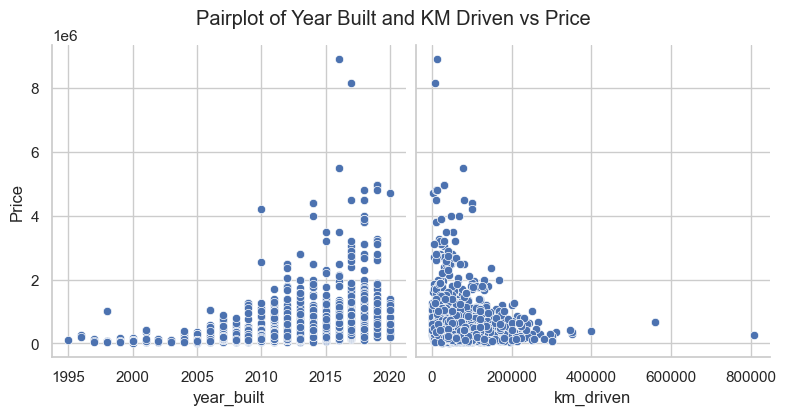

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


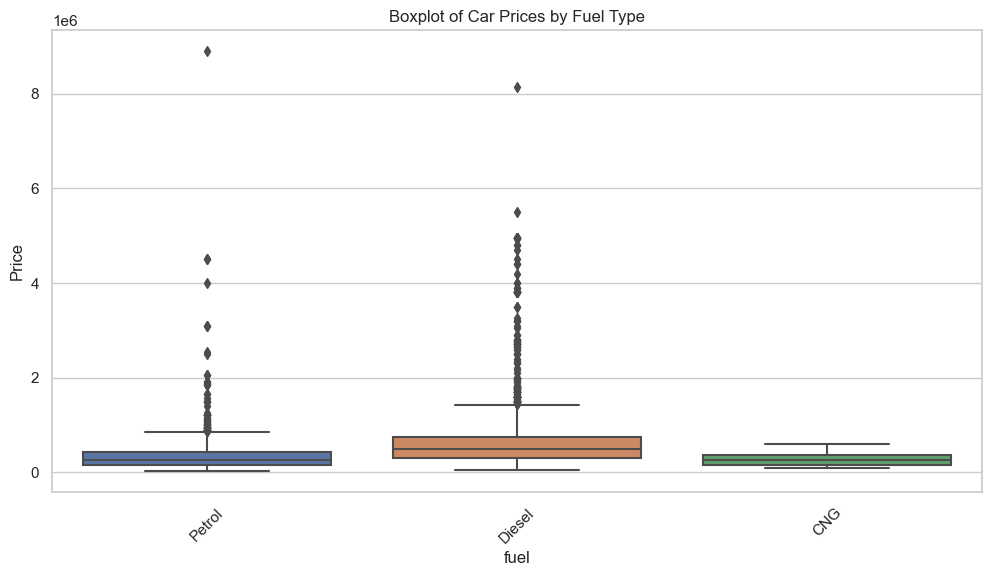

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


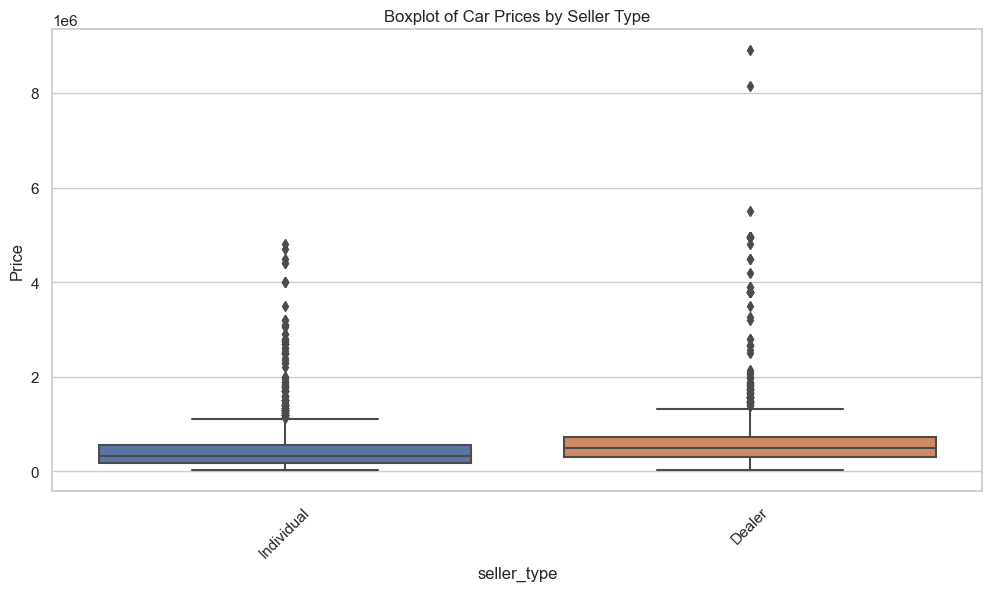

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


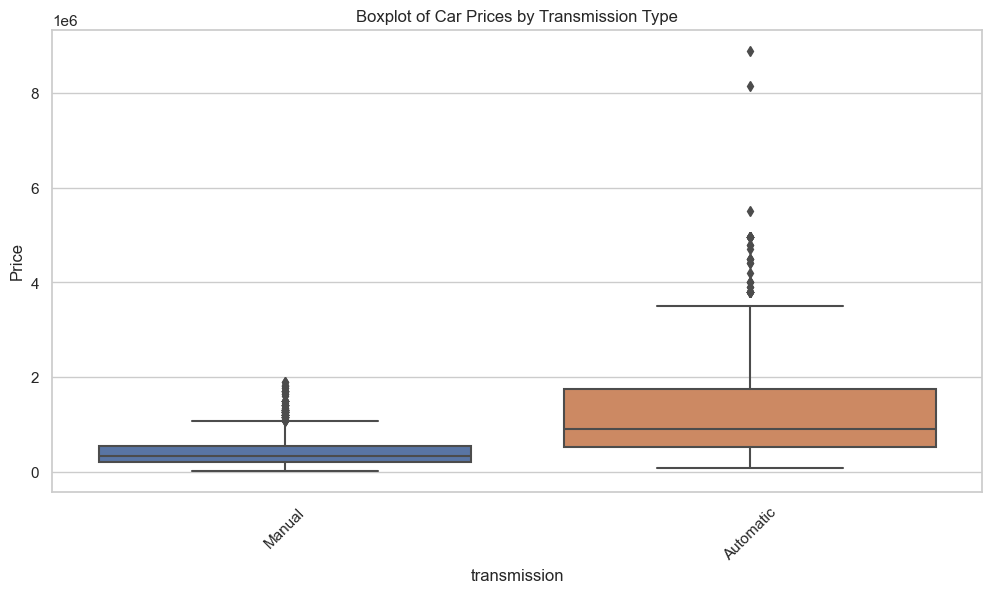

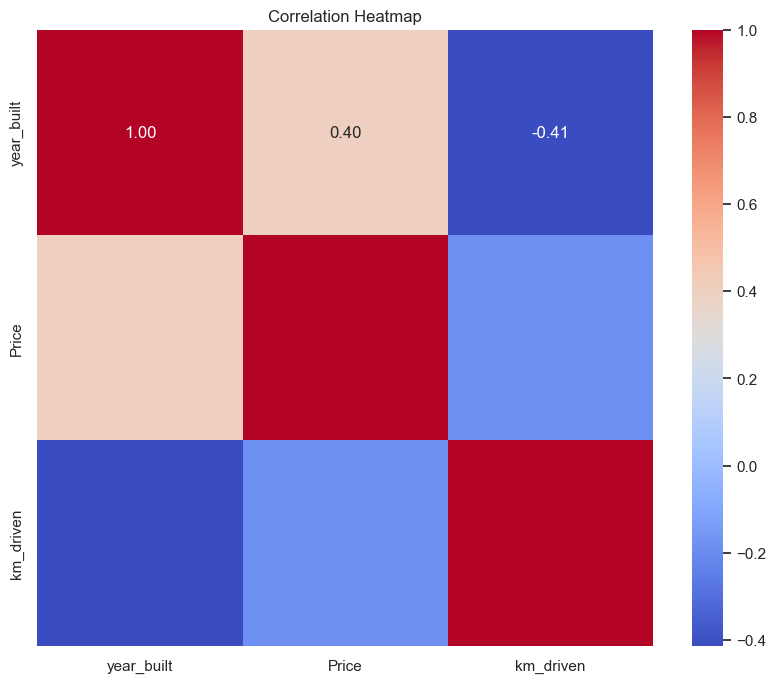

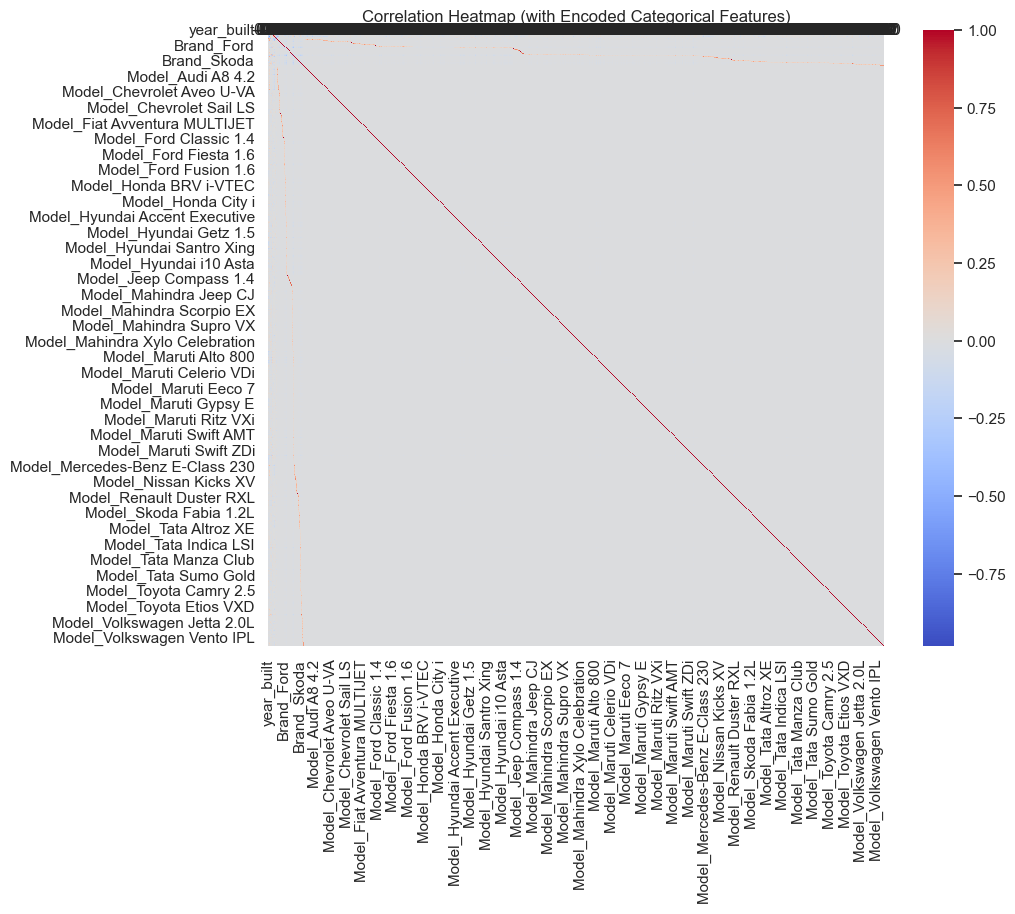

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Pairplot to visualize relationships
sns.pairplot(df, x_vars=['year_built', 'km_driven'], y_vars='Price', kind='scatter', height=4, aspect=1)
plt.suptitle('Pairplot of Year Built and KM Driven vs Price', y=1.02)
plt.show()

# Boxplot to analyze price distribution by categorical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel', y='Price', data=df)
plt.title('Boxplot of Car Prices by Fuel Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='seller_type', y='Price', data=df)
plt.title('Boxplot of Car Prices by Seller Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='transmission', y='Price', data=df)
plt.title('Boxplot of Car Prices by Transmission Type')
plt.xticks(rotation=45)
plt.show()

# Heatmap to show correlation between numerical features
"""plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()"""
# Get only numeric columns
numeric_df = df.select_dtypes(include=[np.number])  # Include only numeric data types

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()
# One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first to avoid dummy variable trap

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (with Encoded Categorical Features)')
plt.show()



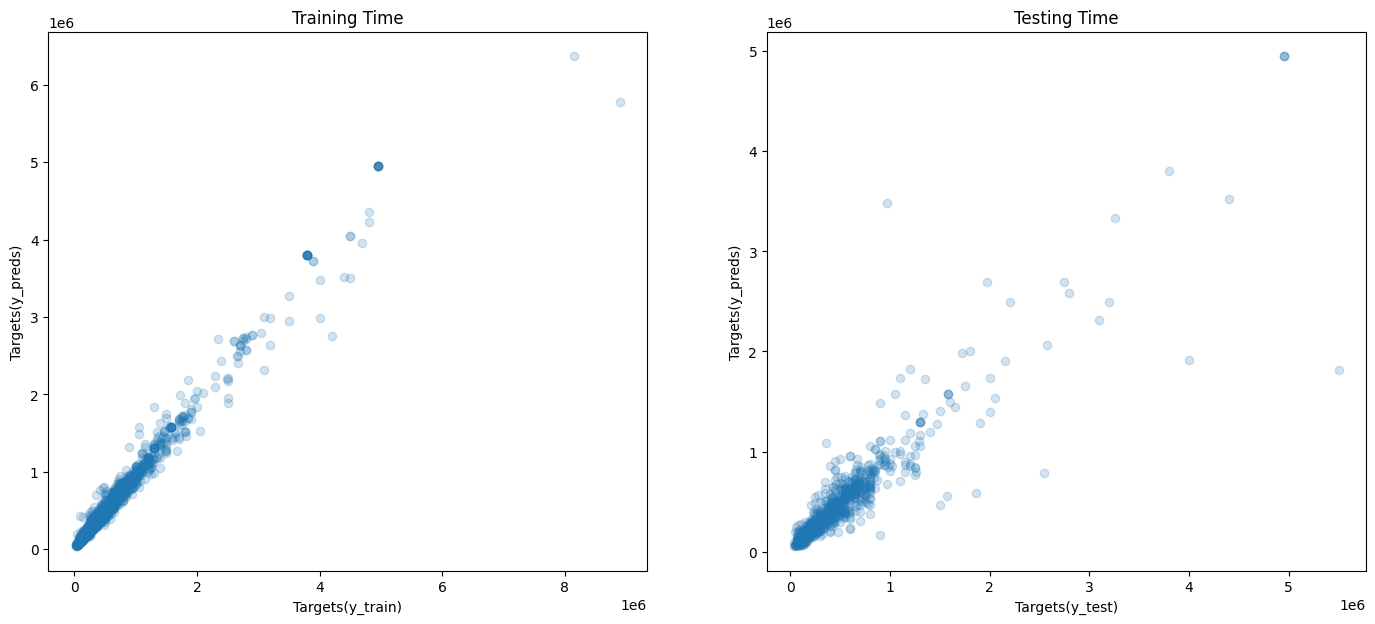

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (17,7))
y_preds = pipe.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_preds, alpha = 0.2);
plt.xlabel("Targets(y_train)");
plt.ylabel("Targets(y_preds)");
plt.title("Training Time");

y_pred = pipe.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred, alpha = 0.2);
plt.xlabel("Targets(y_test)");
plt.ylabel("Targets(y_preds)");
plt.title("Testing Time");


In [3]:
import pickle
pickle.dump(pipe, open("RandomForestModel.pkl","wb"))

In [4]:
from sklearn.ensemble import RandomForestRegressor
scores2 = []
for i in range(0, 1001, 10):  # Start with 10 iterations for debugging
    try:
        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=i)
        rf = RandomForestRegressor(random_state=i)
        pipe = make_pipeline(column_trans, rf)
        pipe.fit(X_tr, y_tr)
        y_pred = pipe.predict(X_te)
        score = r2_score(y_te, y_pred)
        scores2.append(score)
    except Exception as e:
        print(f"Error at iteration {i}: {e}")

print(np.argmax(scores2))
print(scores2[np.argmax(scores2)])

KeyboardInterrupt: 